                 Open       High        Low    Volume      Close  Adj Close
Date                                                                       
2010-06-29  19.000000  25.000000  17.540001  18766300  23.889999  23.889999
2010-06-30  25.790001  30.420000  23.299999  17187100  23.830000  23.830000
2010-07-01  25.000000  25.920000  20.270000   8218800  21.959999  21.959999
2010-07-02  23.000000  23.100000  18.709999   5139800  19.200001  19.200001
2010-07-06  20.000000  20.000000  15.830000   6866900  16.110001  16.110001
2010-07-07  16.400000  16.629999  14.980000   6921700  15.800000  15.800000
2010-07-08  16.139999  17.520000  15.570000   7711400  17.459999  17.459999
2010-07-09  17.580000  17.900000  16.549999   4050600  17.400000  17.400000
2010-07-12  17.950001  18.070000  17.000000   2202500  17.049999  17.049999
2010-07-13  17.389999  18.639999  16.900000   2680100  18.139999  18.139999


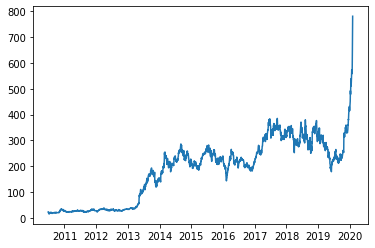

In [1]:
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col=['Date'])

print(data.head(10))
plt.plot(data['Close'])

In [2]:
x = data[list(data.columns[0:4])]
y = data[list(data.columns[4:5])]
scale = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
samp_x_train = x_train
samp_x_test = x_test
samp_y_train = y_train
samp_y_test = y_test
print(samp_y_train)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_train

                 Close
Date                  
2018-12-28  333.869995
2014-08-04  238.520004
2012-10-26   27.379999
2019-04-25  247.630005
2015-08-05  270.130005
...                ...
2015-04-24  218.429993
2010-09-15   21.980000
2012-10-01   29.160000
2019-02-14  303.769989
2014-06-06  208.169998

[1932 rows x 1 columns]


array([[[ 1.14908771],
        [ 1.20949642],
        [ 1.15616196],
        [ 0.87503753]],

       [[ 0.40163002],
        [ 0.41759884],
        [ 0.42737513],
        [ 0.07972643]],

       [[-1.34106187],
        [-1.34171424],
        [-1.33809687],
        [-1.01597736]],

       ...,

       [[-1.32446481],
        [-1.32442715],
        [-1.32114834],
        [-0.9346335 ]],

       [[ 0.98294855],
        [ 0.96574016],
        [ 1.00713469],
        [-0.07194889]],

       [[ 0.19412453],
        [ 0.17202287],
        [ 0.20404818],
        [-0.4970555 ]]])

In [3]:
def create_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(4,1), return_sequences=False))
    #model.add(Dense(25, activation = 'linear'))
    #model.add(Dropout(0.05))
    model.add(Dense(10, activation = 'linear'))
    model.add(Dense(5, activation = 'linear'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

Epoch 1/500
61/61 - 1s - loss: 48682.1445 - mse: 48682.1445 - val_loss: 46871.3516 - val_mse: 46871.3516
Epoch 2/500
61/61 - 0s - loss: 43154.3945 - mse: 43154.3945 - val_loss: 34829.6211 - val_mse: 34829.6211
Epoch 3/500
61/61 - 0s - loss: 26257.3164 - mse: 26257.3164 - val_loss: 16869.6074 - val_mse: 16869.6074
Epoch 4/500
61/61 - 0s - loss: 10863.1650 - mse: 10863.1650 - val_loss: 5842.4966 - val_mse: 5842.4966
Epoch 5/500
61/61 - 0s - loss: 4130.0498 - mse: 4130.0498 - val_loss: 3262.3037 - val_mse: 3262.3037
Epoch 6/500
61/61 - 0s - loss: 2834.8992 - mse: 2834.8992 - val_loss: 2635.1021 - val_mse: 2635.1021
Epoch 7/500
61/61 - 0s - loss: 2084.7275 - mse: 2084.7275 - val_loss: 1699.7566 - val_mse: 1699.7566
Epoch 8/500
61/61 - 0s - loss: 1263.7521 - mse: 1263.7521 - val_loss: 1142.0785 - val_mse: 1142.0785
Epoch 9/500
61/61 - 0s - loss: 889.5482 - mse: 889.5482 - val_loss: 906.0420 - val_mse: 906.0420
Epoch 10/500
61/61 - 0s - loss: 730.4592 - mse: 730.4592 - val_loss: 771.2144 - v

Epoch 87/500
61/61 - 0s - loss: 18.7986 - mse: 18.7986 - val_loss: 23.1566 - val_mse: 23.1566
Epoch 88/500
61/61 - 0s - loss: 19.0870 - mse: 19.0870 - val_loss: 20.3587 - val_mse: 20.3587
Epoch 89/500
61/61 - 0s - loss: 18.1601 - mse: 18.1601 - val_loss: 19.6082 - val_mse: 19.6082
Epoch 90/500
61/61 - 0s - loss: 18.2215 - mse: 18.2215 - val_loss: 26.5906 - val_mse: 26.5906
Epoch 91/500
61/61 - 0s - loss: 20.4059 - mse: 20.4059 - val_loss: 20.8088 - val_mse: 20.8088
Epoch 92/500
61/61 - 0s - loss: 17.8891 - mse: 17.8891 - val_loss: 21.7305 - val_mse: 21.7305
Epoch 93/500
61/61 - 0s - loss: 19.3849 - mse: 19.3849 - val_loss: 27.9473 - val_mse: 27.9473
Epoch 94/500
61/61 - 0s - loss: 17.4449 - mse: 17.4449 - val_loss: 21.1706 - val_mse: 21.1706
Epoch 95/500
61/61 - 0s - loss: 18.6346 - mse: 18.6346 - val_loss: 21.5397 - val_mse: 21.5397
Epoch 96/500
61/61 - 0s - loss: 18.1652 - mse: 18.1652 - val_loss: 24.2823 - val_mse: 24.2823
Epoch 97/500
61/61 - 0s - loss: 17.9428 - mse: 17.9428 - val

Epoch 174/500
61/61 - 0s - loss: 12.9531 - mse: 12.9531 - val_loss: 16.3134 - val_mse: 16.3134
Epoch 175/500
61/61 - 0s - loss: 12.6579 - mse: 12.6579 - val_loss: 15.8441 - val_mse: 15.8441
Epoch 176/500
61/61 - 0s - loss: 13.1156 - mse: 13.1156 - val_loss: 16.5464 - val_mse: 16.5464
Epoch 177/500
61/61 - 0s - loss: 12.4907 - mse: 12.4907 - val_loss: 16.0890 - val_mse: 16.0890
Epoch 178/500
61/61 - 0s - loss: 13.1139 - mse: 13.1139 - val_loss: 14.3899 - val_mse: 14.3899
Epoch 179/500
61/61 - 0s - loss: 12.5221 - mse: 12.5221 - val_loss: 14.6066 - val_mse: 14.6066
Epoch 180/500
61/61 - 0s - loss: 13.4224 - mse: 13.4224 - val_loss: 14.9688 - val_mse: 14.9688
Epoch 181/500
61/61 - 0s - loss: 12.6546 - mse: 12.6546 - val_loss: 13.8016 - val_mse: 13.8016
Epoch 182/500
61/61 - 0s - loss: 11.7637 - mse: 11.7637 - val_loss: 14.1582 - val_mse: 14.1582
Epoch 183/500
61/61 - 0s - loss: 12.5060 - mse: 12.5060 - val_loss: 16.1205 - val_mse: 16.1205
Epoch 184/500
61/61 - 0s - loss: 12.0387 - mse: 12

Epoch 261/500
61/61 - 0s - loss: 8.4153 - mse: 8.4153 - val_loss: 9.0905 - val_mse: 9.0905
Epoch 262/500
61/61 - 0s - loss: 9.1979 - mse: 9.1979 - val_loss: 9.9945 - val_mse: 9.9945
Epoch 263/500
61/61 - 0s - loss: 8.1720 - mse: 8.1720 - val_loss: 10.3580 - val_mse: 10.3580
Epoch 264/500
61/61 - 0s - loss: 8.7960 - mse: 8.7960 - val_loss: 9.3571 - val_mse: 9.3571
Epoch 265/500
61/61 - 0s - loss: 8.4134 - mse: 8.4134 - val_loss: 10.3289 - val_mse: 10.3289
Epoch 266/500
61/61 - 0s - loss: 7.4946 - mse: 7.4946 - val_loss: 9.5013 - val_mse: 9.5013
Epoch 267/500
61/61 - 0s - loss: 7.3534 - mse: 7.3534 - val_loss: 8.5281 - val_mse: 8.5281
Epoch 268/500
61/61 - 0s - loss: 8.5767 - mse: 8.5767 - val_loss: 9.6750 - val_mse: 9.6750
Epoch 269/500
61/61 - 0s - loss: 7.5529 - mse: 7.5529 - val_loss: 8.4488 - val_mse: 8.4488
Epoch 270/500
61/61 - 0s - loss: 8.3536 - mse: 8.3536 - val_loss: 9.1320 - val_mse: 9.1320
Epoch 271/500
61/61 - 0s - loss: 7.5930 - mse: 7.5930 - val_loss: 9.1915 - val_mse: 9.

Epoch 351/500
61/61 - 0s - loss: 5.5653 - mse: 5.5653 - val_loss: 6.8928 - val_mse: 6.8928
Epoch 352/500
61/61 - 0s - loss: 5.7405 - mse: 5.7405 - val_loss: 6.2087 - val_mse: 6.2087
Epoch 353/500
61/61 - 0s - loss: 5.5150 - mse: 5.5150 - val_loss: 7.3031 - val_mse: 7.3031
Epoch 354/500
61/61 - 0s - loss: 5.6958 - mse: 5.6958 - val_loss: 6.9287 - val_mse: 6.9287
Epoch 355/500
61/61 - 0s - loss: 5.3458 - mse: 5.3458 - val_loss: 6.7824 - val_mse: 6.7824
Epoch 356/500
61/61 - 0s - loss: 6.4034 - mse: 6.4034 - val_loss: 9.8216 - val_mse: 9.8216
Epoch 357/500
61/61 - 0s - loss: 5.8284 - mse: 5.8284 - val_loss: 9.1828 - val_mse: 9.1828
Epoch 358/500
61/61 - 0s - loss: 5.5008 - mse: 5.5008 - val_loss: 8.7059 - val_mse: 8.7059
Epoch 359/500
61/61 - 0s - loss: 5.2000 - mse: 5.2000 - val_loss: 6.5266 - val_mse: 6.5266
Epoch 360/500
61/61 - 0s - loss: 5.6224 - mse: 5.6224 - val_loss: 6.8774 - val_mse: 6.8774
Epoch 361/500
61/61 - 0s - loss: 5.3371 - mse: 5.3371 - val_loss: 8.9624 - val_mse: 8.9624

Epoch 441/500
61/61 - 0s - loss: 6.2175 - mse: 6.2175 - val_loss: 8.4327 - val_mse: 8.4327
Epoch 442/500
61/61 - 0s - loss: 5.8868 - mse: 5.8868 - val_loss: 6.5381 - val_mse: 6.5381
Epoch 443/500
61/61 - 0s - loss: 5.7246 - mse: 5.7246 - val_loss: 6.6188 - val_mse: 6.6188
Epoch 444/500
61/61 - 0s - loss: 5.3151 - mse: 5.3151 - val_loss: 7.0417 - val_mse: 7.0417
Epoch 445/500
61/61 - 0s - loss: 4.7147 - mse: 4.7147 - val_loss: 6.6966 - val_mse: 6.6966
Epoch 446/500
61/61 - 0s - loss: 5.3957 - mse: 5.3957 - val_loss: 9.6930 - val_mse: 9.6930
Epoch 447/500
61/61 - 0s - loss: 5.4039 - mse: 5.4039 - val_loss: 9.4229 - val_mse: 9.4229
Epoch 448/500
61/61 - 0s - loss: 5.0140 - mse: 5.0140 - val_loss: 8.4732 - val_mse: 8.4732
Epoch 449/500
61/61 - 0s - loss: 5.7164 - mse: 5.7164 - val_loss: 9.1593 - val_mse: 9.1593
Epoch 450/500
61/61 - 0s - loss: 5.0058 - mse: 5.0058 - val_loss: 8.9861 - val_mse: 8.9861
Epoch 451/500
61/61 - 0s - loss: 5.2824 - mse: 5.2824 - val_loss: 6.6611 - val_mse: 6.6611

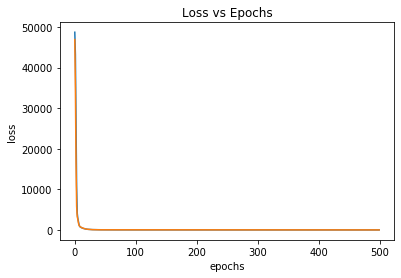

In [4]:
clf = create_model()
#estimator = KerasRegressor(build_fn=create_model, epochs=10, verbose = 2)
model = clf.fit(x_train, y_train, batch_size = 32, epochs = 500, verbose = 2, validation_data = (x_test,y_test))
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.show()

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


                 Close
Date                  
2010-06-29   25.783707
2010-06-30   28.076675
2010-07-01   22.753193
2010-07-02   21.898205
2010-07-06   18.208736
...                ...
2020-01-28  564.966797
2020-01-29  580.853821
2020-01-30  642.765259
2020-01-31  628.395386
2020-02-03  780.457092

[2416 rows x 1 columns]


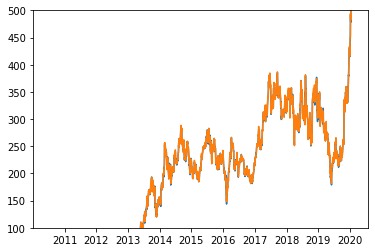

In [5]:
trainPredict = clf.predict(x_train)
testPredict = clf.predict(x_test)
df = pd.DataFrame(data = trainPredict, columns=['data'])
df1 = pd.DataFrame(data = testPredict, columns=['data'])
for i in range(0,len(samp_y_train)):
    samp_y_train['Close'][i] = df['data'][i]
for i in range(0,len(samp_y_test)):
    samp_y_test['Close'][i] = df1['data'][i]
overall = pd.concat([samp_y_train, samp_y_test])
overall = overall.sort_index()
print(overall)
axes = plt.gca()
axes.set_ylim([100,500])
plt.plot(data['Close'])
plt.plot(overall['Close'])

In [6]:
test = np.array([[820.86, 832.5, 796, 12254580]])
test = scale.transform(test)
temp = test.reshape((test.shape[0], test.shape[1], 1))
ans = clf.predict(temp)
ans

array([[714.09283]], dtype=float32)

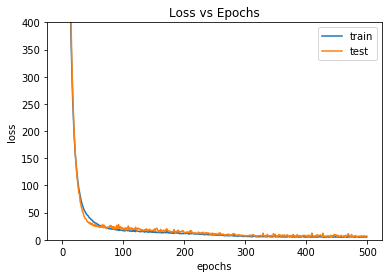

In [7]:
axes = plt.gca()
axes.set_ylim([0,400])
plt.plot(model.history['loss'], label = 'train')
plt.plot(model.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend(loc="upper right")
plt.show()

In [49]:
fdata = pd.read_csv('fdata.csv', parse_dates=['Date'], index_col=['Date'])
fdata = fdata.dropna()
feature = fdata[list(fdata.columns[0:4])]
label = fdata[list(fdata.columns[4:5])]
tempLabel = label
print(label)

             Close
Date              
2020-01-06  451.54
2020-01-07  469.06
2020-01-08  492.14
2020-01-09  481.34
2020-01-10  478.15
...            ...
2020-05-19  808.01
2020-05-20  815.56
2020-05-21  827.60
2020-05-22  816.88
2020-05-26  818.87

[98 rows x 1 columns]


In [53]:
temp = np.array(feature)
temp = scale.transform(temp)
temp = temp.reshape((temp.shape[0], temp.shape[1], 1))
ans = clf.predict(temp)

In [54]:
df = pd.DataFrame(data = ans, columns=['data'])
for i in range(0,len(tempLabel)):
    tempLabel[' Close'][i] = df['data'][i]
tempLabel

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Close
Date,
2020-01-06,451.408813
2020-01-07,465.777618
2020-01-08,494.578461
2020-01-09,484.294220
2020-01-10,482.221680
...,...
2020-05-19,709.819946
2020-05-20,706.527405
2020-05-21,714.529419


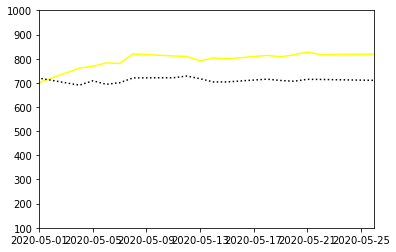

In [58]:
from datetime import datetime
%matplotlib inline
axes = plt.gca()
plt.plot(overall['Close'])
label = fdata[list(fdata.columns[4:5])]
plt.plot(label[' Close'],color ='yellow')
plt.plot(tempLabel[' Close'], color ='black', linestyle = 'dotted')
datemin = datetime(2020,5,1)
datemax = datetime(2020,5,26) 
axes.set_ylim([100,1000])
axes.set_xlim(datemin,datemax)
plt.show()

In [62]:
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
arima = ARIMA(tempLabel[' Close'], order=(0, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 8)
f = pd.DataFrame(forecast[0], columns = [' Close'])
days = pd.date_range(start = '2020-05-27', end = '2020-06-03', freq='D')
d = pd.DataFrame(days, columns = ['Date'])
ans = pd.DataFrame({'date': d['Date'], 'Close': f[' Close']})
ans['date'] = pd.to_datetime(ans['date'])
ans = ans.set_index('date')
ans.head()

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/dev/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Close
date,
2020-05-27,712.984508
2020-05-28,715.653648
2020-05-29,718.322788
2020-05-30,720.991928
2020-05-31,723.661067


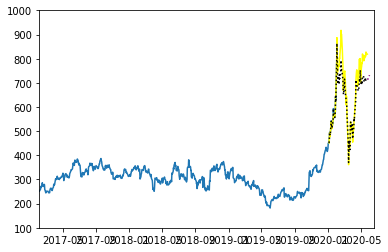

In [63]:
from datetime import datetime
%matplotlib inline
axes = plt.gca()
plt.plot(overall['Close'])
plt.plot(label[' Close'],color ='yellow')
plt.plot(tempLabel[' Close'], color ='black', linestyle = 'dotted')
plt.plot(ans['Close'], color = 'purple', linestyle = 'dotted')
datemin = datetime(2017,2,3)
datemax = datetime(2020,6,20) 
axes.set_ylim([100,1000])
axes.set_xlim(datemin,datemax)
plt.show()